### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼만큼 발생하는지 회귀 예측 진행

In [1]:
import pandas as pd

a_df = pd.read_csv('./datasets/advertising.csv')
a_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
columns = ['TV', 'Radio', 'Newspaper', 'Sales']

pre_a_df = a_df[columns]
pre_a_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
pre_a_df.corr()['Sales'].sort_values(ascending=False)[1:]

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

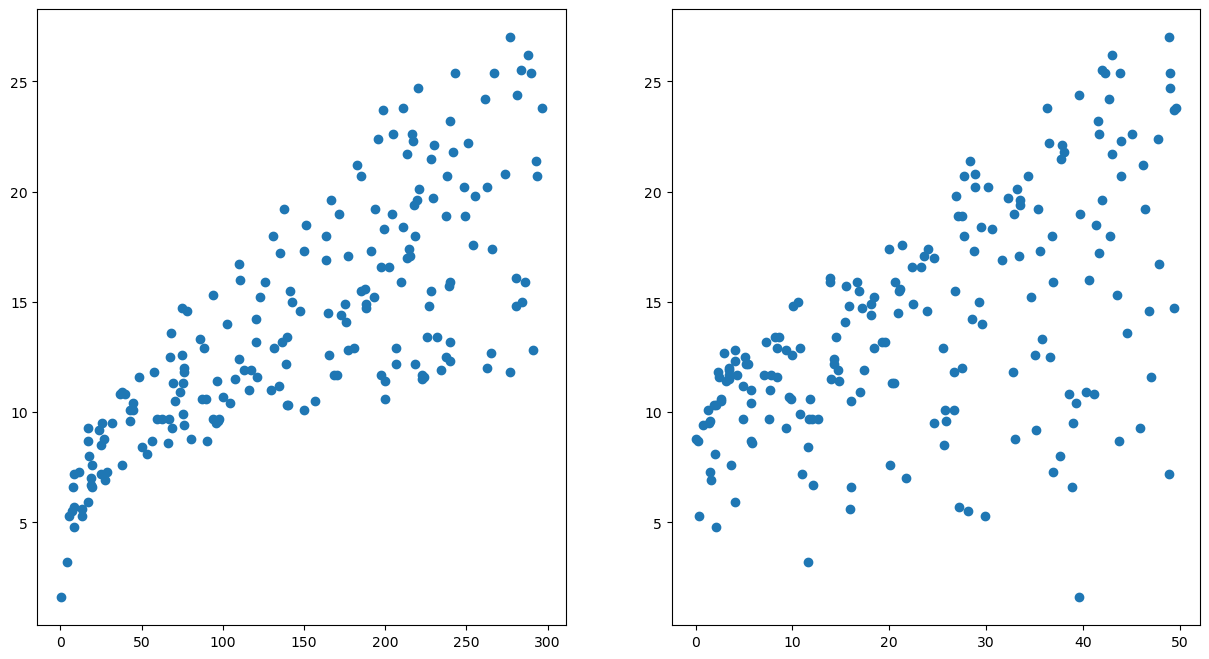

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].scatter(pre_a_df['TV'], pre_a_df['Sales'])
axes[1].scatter(pre_a_df['Radio'], pre_a_df['Sales'])
plt.show()

In [6]:
pre_a_df = pre_a_df[['TV', 'Sales']]
pre_a_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

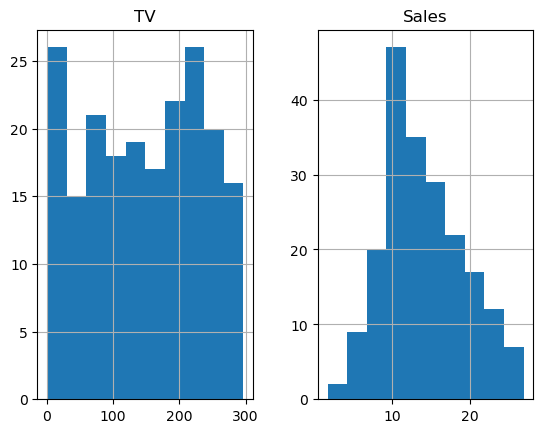

In [7]:
pre_a_df.hist()

In [21]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [37]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()
# 0.0000000001 == 1e-10
optimizer = SGD(l_r.parameters(), lr=0.00001)

epochs = 1500000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

 100/1500000: W: 0.0819, b: 0.2694, loss: 21.8527
 200/1500000: W: 0.0819, b: 0.2726, loss: 21.8425
 300/1500000: W: 0.0819, b: 0.2758, loss: 21.8324
 400/1500000: W: 0.0818, b: 0.2790, loss: 21.8222
 500/1500000: W: 0.0818, b: 0.2822, loss: 21.8121
 600/1500000: W: 0.0818, b: 0.2853, loss: 21.8020
 700/1500000: W: 0.0818, b: 0.2885, loss: 21.7918
 800/1500000: W: 0.0818, b: 0.2917, loss: 21.7817
 900/1500000: W: 0.0818, b: 0.2949, loss: 21.7716
1000/1500000: W: 0.0817, b: 0.2981, loss: 21.7615
1100/1500000: W: 0.0817, b: 0.3012, loss: 21.7514
1200/1500000: W: 0.0817, b: 0.3044, loss: 21.7413
1300/1500000: W: 0.0817, b: 0.3076, loss: 21.7313
1400/1500000: W: 0.0817, b: 0.3108, loss: 21.7212
1500/1500000: W: 0.0817, b: 0.3139, loss: 21.7112
1600/1500000: W: 0.0816, b: 0.3171, loss: 21.7011
1700/1500000: W: 0.0816, b: 0.3203, loss: 21.6911
1800/1500000: W: 0.0816, b: 0.3234, loss: 21.6811
1900/1500000: W: 0.0816, b: 0.3266, loss: 21.6711
2000/1500000: W: 0.0816, b: 0.3298, loss: 21.6611


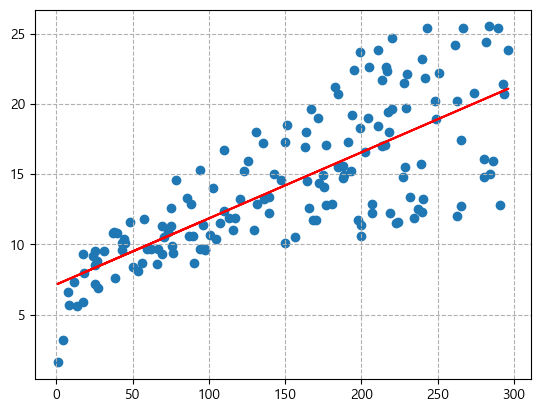

In [41]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0470 * X_train + 7.1501, color="red")
plt.grid(visible=True, linestyle='--')  
plt.show()

In [43]:
import numpy as np

H = 0.0470 * X_test + 7.1501
# RMSE
print(np.sqrt(mse_loss(H, y_test).item()))

3.0652680635454383


#### Sklearn - LinearRegression Task

In [44]:
pre_a_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W: 0.0467, b: 7.2020


In [46]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
     .format(mean_squared_error(y_test, prediction), np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 9.4174, RMSE loss: 3.0688


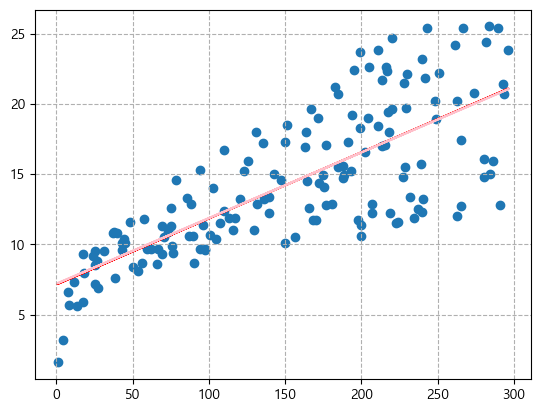

In [51]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0470 * X_train + 7.1501, color="red")
plt.plot(X_train, 0.0467 * X_train + 7.2020, color="pink")
plt.grid(visible=True, linestyle='--')  
plt.show()